#### Author: Diogo Viana

#### Data Scientist & Data Analyst

2024

Contact information
- https://github.com/DiogocViana
- https://www.linkedin.com/in/diogo-viana/

This dataset, acquired from Kaggle (https://www.kaggle.com/datasets/dillonmyrick/bike-store-sample-database/data), represents a sample dataset for a retail bike store sourced from sqlservertutorial.net. Within this notebook, I aim to showcase my proficiency in working with SQL datasets and querying relational databases using Python. Please note that this notebook is a work in progress, and I anticipate refining this introduction section in subsequent iterations

In [260]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [261]:
#After downloading the relational database, import all its tables

brands = pd.read_csv('brands.csv')
categories = pd.read_csv('categories.csv')
customers = pd.read_csv('customers.csv')
order_items = pd.read_csv('order_items.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
staffs = pd.read_csv('staffs.csv')
stocks = pd.read_csv('stocks.csv')
stores = pd.read_csv('stores.csv')

In [262]:
#Create the database conection
connection = sqlite3.connect('bike_store.db')

# Insert data into database
brands.to_sql('brands', connection, if_exists='replace', index=False)
categories.to_sql('categories', connection, if_exists='replace', index=False)
customers.to_sql('customers', connection, if_exists='replace', index=False)
order_items.to_sql('order_items', connection, if_exists='replace', index=False)
orders.to_sql('orders', connection, if_exists='replace', index=False)
products.to_sql('products', connection, if_exists='replace', index=False)
staffs.to_sql('staffs', connection, if_exists='replace', index=False)
stocks.to_sql('stocks', connection, if_exists='replace', index=False)
stores.to_sql('stores', connection, if_exists='replace', index=False)

3

---
### Overview of each table

*Brands Table*

In [263]:
query = 'SELECT * FROM  brands'

df = pd.read_sql_query(query, connection)
df

,brand_id,brand_name
0,1,Electra
1,2,Haro
2,3,Heller
3,4,Pure Cycles
4,5,Ritchey
5,6,Strider
6,7,Sun Bicycles
7,8,Surly
8,9,Trek


In [264]:
query = 'SELECT COUNT (*) FROM  brands'

df = pd.read_sql_query(query, connection)
df

,COUNT (*)
0,9


In [265]:
engine = create_engine('sqlite:///bike_store.db')

table_name = 'brands'  

df = pd.read_sql_table(table_name, con=engine)

print(df.dtypes)

brand_id       int64
brand_name    object
dtype: object


As we can see, there are 9 rows in the brands table.

The data types on this table are:

brand_id (int64): This column contains integer values (int64), which suggests that each value in the 'brand_id' column is a whole number.

brand_name (object): This column contains text or string values (object).

*Categories Table*

In [266]:
query = 'SELECT * FROM  categories'

df = pd.read_sql_query(query, connection)
df

,category_id,category_name
0,1,Children Bicycles
1,2,Comfort Bicycles
2,3,Cruisers Bicycles
3,4,Cyclocross Bicycles
4,5,Electric Bikes
5,6,Mountain Bikes
6,7,Road Bikes


In [267]:
query = 'SELECT COUNT (*) FROM  categories'

df = pd.read_sql_query(query, connection)
df

,COUNT (*)
0,7


In [268]:
engine = create_engine('sqlite:///bike_store.db')

table_name = 'categories'  

df = pd.read_sql_table(table_name, con=engine)

print(df.dtypes)

category_id       int64
category_name    object
dtype: object


As we can see, there are 7 rows in the categories table.

The data types on this table are:

category_id (int64): This column contains integer values (int64), indicating that each value in the 'category_id' column is a whole number.

category_name (object): This column contains text or string values (object). 

*Customers Table*

In [269]:
query = 'SELECT * FROM  customers LIMIT 5'

df = pd.read_sql_query(query, connection)
df

,customer_id,first_name,last_name,phone,email,street,city,state,zip_code
0,1,Debra,Burks,None,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY,14127
1,2,Kasha,Todd,None,kasha.todd@yahoo.com,910 Vine Street,Campbell,CA,95008
2,3,Tameka,Fisher,None,tameka.fisher@aol.com,769C Honey Creek St.,Redondo Beach,CA,90278
3,4,Daryl,Spence,None,daryl.spence@aol.com,988 Pearl Lane,Uniondale,NY,11553
4,5,Charolette,Rice,(916) 381-6003,charolette.rice@msn.com,107 River Dr.,Sacramento,CA,95820


In [270]:
query = 'SELECT COUNT (*) FROM  customers'

df = pd.read_sql_query(query, connection)
df

,COUNT (*)
0,1445


In [271]:
engine = create_engine('sqlite:///bike_store.db')

table_name = 'customers'  

df = pd.read_sql_table(table_name, con=engine)

print(df.dtypes)

customer_id     int64
first_name     object
last_name      object
phone          object
email          object
street         object
city           object
state          object
zip_code        int64
dtype: object


The customers table comprises 9 columns and 1445 rows. Let's examine the number of unique values in certain columns within this table.

The data types on this table are:

customer_id (int64): This column contains integer values (int64), indicating that each value in the 'customer_id' column is a whole number.

first_name (object): This column contains text or string values (object), representing the first names of the customers.

last_name (object): Similar to 'first_name', this column contains text or string values (object), representing the last names of the customers.

phone (object): This column contains text or string values (object), representing the phone numbers of the customers.

email (object): This column contains text or string values (object), representing the email addresses of the customers.

street (object): This column contains text or string values (object), representing the street addresses of the customers.

city (object): This column contains text or string values (object), representing the cities where the customers reside.

state (object): This column contains text or string values (object), representing the states where the customers reside.

In [272]:
query = 'SELECT DISTINCT first_name FROM  customers'

df = pd.read_sql_query(query, connection)
df

,first_name
0,Debra
1,Kasha
2,Tameka
3,Daryl
4,Charolette
...,...
1260,Son
1261,Florrie
1262,Ernest
1263,Cassie


In [273]:
query = 'SELECT DISTINCT email FROM  customers'

df = pd.read_sql_query(query, connection)
df

,email
0,debra.burks@yahoo.com
1,kasha.todd@yahoo.com
2,tameka.fisher@aol.com
3,daryl.spence@aol.com
4,charolette.rice@msn.com
...,...
1440,jamaal.morrison@msn.com
1441,cassie.cline@gmail.com
1442,lezlie.lamb@gmail.com
1443,ivette.estes@gmail.com


In [274]:
query = 'SELECT DISTINCT city FROM  customers'

df = pd.read_sql_query(query, connection)
df

,city
0,Orchard Park
1,Campbell
2,Redondo Beach
3,Uniondale
4,Sacramento
...,...
190,Copperas Cove
191,Oakland Gardens
192,Tonawanda
193,Far Rockaway


Upon reviewing the outcomes of the three queries mentioned earlier, it becomes apparent that there are 180 individuals with identical names. Therefore, considering an alternative column or merging it with another is necessary for a more in-depth investigation. Conversely, the email column appears to be unique for each customer. Furthermore, a noteworthy observation is that the city information, gleaned from the above queries, reveals 195 distinct cities, which may prove crucial for future analyses.

*Order Items Table*

In [275]:
query = 'SELECT * FROM order_items LIMIT 5'

df = pd.read_sql_query(query, connection)
df

,order_id,item_id,product_id,quantity,list_price,discount
0,1,1,20,1,599.99,0.20
1,1,2,8,2,1799.99,0.07
2,1,3,10,2,1549.00,0.05
3,1,4,16,2,599.99,0.05
4,1,5,4,1,2899.99,0.20


In [276]:
query = 'SELECT COUNT (*) FROM  order_items'

df = pd.read_sql_query(query, connection)
df

,COUNT (*)
0,4722


In [277]:
query = 'SELECT DISTINCT discount FROM order_items'

df = pd.read_sql_query(query, connection)
df

,discount
0,0.20
1,0.07
2,0.05
3,0.10


In [278]:
engine = create_engine('sqlite:///bike_store.db')

table_name = 'order_items'  

df = pd.read_sql_table(table_name, con=engine)

print(df.dtypes)

order_id        int64
item_id         int64
product_id      int64
quantity        int64
list_price    float64
discount      float64
dtype: object


The 'order_items' table encompasses 6 columns and consists of 4722 rows. Significantly, it is notable that the provided discounts exhibit variation, ranging between 5%, 7%, 10%, and 20%.

The data types on this table are:

order_id (int64): This column contains integer values (int64), indicating that each value in the 'order_id' column is a whole number. 

item_id (int64): Similar to 'order_id', this column contains integer values (int64), indicating that each value in the 'item_id' column is a whole number.

product_id (int64): This column contains integer values (int64), indicating that each value in the 'product_id' column is a whole number.

quantity (int64): This column contains integer values (int64), indicating the quantity of products ordered.

list_price (float64): This column contains floating-point values (float64), indicating the list price of the products.

discount (float64): Similar to 'list_price', this column contains floating-point values (float64), indicating the discount applied to the products.

*Orders Table*

In [279]:
query = 'SELECT * FROM  orders LIMIT 5'

df = pd.read_sql_query(query, connection)
df

,order_id,customer_id,order_status,order_date,required_date,shipped_date,store_id,staff_id
0,1,259,4,2016-01-01,2016-01-03,2016-01-03,1,2
1,2,1212,4,2016-01-01,2016-01-04,2016-01-03,2,6
2,3,523,4,2016-01-02,2016-01-05,2016-01-03,2,7
3,4,175,4,2016-01-03,2016-01-04,2016-01-05,1,3
4,5,1324,4,2016-01-03,2016-01-06,2016-01-06,2,6


In [280]:
query = 'SELECT COUNT (*) FROM  orders'

df = pd.read_sql_query(query, connection)
df

,COUNT (*)
0,1615


In [281]:
query = 'SELECT DISTINCT customer_id FROM orders'

df = pd.read_sql_query(query, connection)
df

,customer_id
0,259
1,1212
2,523
3,175
4,1324
...,...
1440,816
1441,112
1442,35
1443,180


In [282]:
engine = create_engine('sqlite:///bike_store.db')

table_name = 'orders'  

df = pd.read_sql_table(table_name, con=engine)

print(df.dtypes)

order_id          int64
customer_id       int64
order_status      int64
order_date       object
required_date    object
shipped_date     object
store_id          int64
staff_id          int64
dtype: object


Upon reviewing the queries for the 'Orders' table above, it's notable that there are 8 columns and a total of 1615 rows. An intriguing observation is that the 'customer_id' column indicates a count fewer than the total rows (1615). Further investigation into this anomaly could provide valuable insights, a task we may delve into later in this notebook.

The data types on this table are:

order_id (int64): This column contains integer values (int64), indicating that each value in the 'order_id' column is a whole number.

customer_id (int64): Similar to 'order_id', this column contains integer values (int64), indicating customer identifiers.

order_status (int64): This column contains integer values (int64), indicating the status of the order.

order_date (object): This column contains text or string values (object). However, for dates, it would be more appropriate to convert this column to a datetime data type using pd.to_datetime() for better handling of date-related operations.

required_date (object): Similar to 'order_date', this column contains text or string values (object). Converting this column to a datetime data type is recommended.

shipped_date (object): Similar to 'order_date', this column contains text or string values (object). Converting this column to a datetime data type is recommended.

store_id (int64): This column contains integer values (int64), indicating the store associated with the order.

staff_id (int64): This column contains integer values (int64), indicating the staff member associated with the order.

*Products Table*

In [283]:
query = 'SELECT * FROM  products LIMIT 5'

df = pd.read_sql_query(query, connection)
df

,product_id,product_name,brand_id,category_id,model_year,list_price
0,1,Trek 820 - 2016,9,6,2016,379.99
1,2,Ritchey Timberwolf Frameset - 2016,5,6,2016,749.99
2,3,Surly Wednesday Frameset - 2016,8,6,2016,999.99
3,4,Trek Fuel EX 8 29 - 2016,9,6,2016,2899.99
4,5,Heller Shagamaw Frame - 2016,3,6,2016,1320.99


In [284]:
query = 'SELECT COUNT (*) FROM  products'

df = pd.read_sql_query(query, connection)
df

,COUNT (*)
0,321


In [285]:
query = 'SELECT DISTINCT product_name FROM products'

df = pd.read_sql_query(query, connection)
df

,product_name
0,Trek 820 - 2016
1,Ritchey Timberwolf Frameset - 2016
2,Surly Wednesday Frameset - 2016
3,Trek Fuel EX 8 29 - 2016
4,Heller Shagamaw Frame - 2016
...,...
286,Trek Checkpoint ALR 5 - 2019
287,Trek Checkpoint ALR 5 Women's - 2019
288,Trek Checkpoint SL 5 Women's - 2019
289,Trek Checkpoint SL 6 - 2019


In [286]:
query = 'SELECT DISTINCT model_year FROM products'

df = pd.read_sql_query(query, connection)
df

,model_year
0,2016
1,2017
2,2018
3,2019


In [287]:
engine = create_engine('sqlite:///bike_store.db')

table_name = 'products'  

df = pd.read_sql_table(table_name, con=engine)

print(df.dtypes)

product_id        int64
product_name     object
brand_id          int64
category_id       int64
model_year        int64
list_price      float64
dtype: object


By observing the above queries  for the 'Products' table, it reveals 6 columns and a total of 321 rows. Among these, there are 291 distinct product names, indicating a diverse product range. Additionally, noteworthy is that the table encompasses data spanning from 2016 to 2019, presenting valuable temporal information for insightful comparisons across different years.

The data types on this table are:

product_id (int64): This column contains integer values (int64), indicating that each value in the 'product_id' column is a whole number.

product_name (object): This column contains text or string values (object), representing the names of the products.

brand_id (int64): This column contains integer values (int64), indicating the brand associated with each product.

category_id (int64): This column contains integer values (int64), indicating the category to which each product belongs.

model_year (int64): This column contains integer values (int64), representing the model year of each product.

list_price (float64): This column contains floating-point values (float64), indicating the list price of each product.

*Staffs Table*

In [288]:
query = 'SELECT * FROM  staffs'

df = pd.read_sql_query(query, connection)
df

,staff_id,first_name,last_name,email,phone,active,store_id,manager_id
0,1,Fabiola,Jackson,fabiola.jackson@bikes.shop,(831) 555-5554,1,1,NaN
1,2,Mireya,Copeland,mireya.copeland@bikes.shop,(831) 555-5555,1,1,1.0
2,3,Genna,Serrano,genna.serrano@bikes.shop,(831) 555-5556,1,1,2.0
3,4,Virgie,Wiggins,virgie.wiggins@bikes.shop,(831) 555-5557,1,1,2.0
4,5,Jannette,David,jannette.david@bikes.shop,(516) 379-4444,1,2,1.0
5,6,Marcelene,Boyer,marcelene.boyer@bikes.shop,(516) 379-4445,1,2,5.0
6,7,Venita,Daniel,venita.daniel@bikes.shop,(516) 379-4446,1,2,5.0
7,8,Kali,Vargas,kali.vargas@bikes.shop,(972) 530-5555,1,3,1.0
8,9,Layla,Terrell,layla.terrell@bikes.shop,(972) 530-5556,1,3,7.0
9,10,Bernardine,Houston,bernardine.houston@bikes.shop,(972) 530-5557,1,3,7.0


In [289]:
query = 'SELECT COUNT (*) FROM  staffs'

df = pd.read_sql_query(query, connection)
df

,COUNT (*)
0,10


In [290]:
query = 'SELECT DISTINCT staff_id FROM staffs'

df = pd.read_sql_query(query, connection)
df

,staff_id
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [291]:
query = 'SELECT store_id, COUNT (staff_id) AS "Staff per Store" FROM staffs GROUP BY store_id'

df = pd.read_sql_query(query, connection)
df

,store_id,Staff per Store
0,1,4
1,2,3
2,3,3


In [292]:
engine = create_engine('sqlite:///bike_store.db')

table_name = 'staffs'  

df = pd.read_sql_table(table_name, con=engine)

print(df.dtypes)

staff_id        int64
first_name     object
last_name      object
email          object
phone          object
active          int64
store_id        int64
manager_id    float64
dtype: object


Observing the 'staff' table, it consists of 8 columns and comprises 10 rows. Notably, store_id 1 exhibits a higher staff count with 4 members, whereas store_id 2 and 3 each have 3 staff members.

The data types on this table are:

staff_id (int64): This column contains integer values (int64), indicating that each value in the 'staff_id' column is a whole number.

first_name (object): This column contains text or string values (object), representing the first names of the staff members.

last_name (object): Similar to 'first_name', this column contains text or string values (object), representing the last names of the staff members.

email (object): This column contains text or string values (object), representing the email addresses of the staff members.

phone (object): This column contains text or string values (object), representing the phone numbers of the staff members.

active (int64): This column contains integer values (int64), indicating the active status of the staff members.

store_id (int64): This column contains integer values (int64), indicating the store to which each staff member is assigned.

manager_id (float64): This column contains floating-point values (float64), representing the manager ID of the staff members. 

*Stocks Table*

In [293]:
query = 'SELECT * FROM  stocks LIMIT 5'

df = pd.read_sql_query(query, connection)
df

,store_id,product_id,quantity
0,1,1,27
1,1,2,5
2,1,3,6
3,1,4,23
4,1,5,22


In [294]:
#Staffs Table
query = 'SELECT COUNT (*) FROM  stocks'

df = pd.read_sql_query(query, connection)
df

,COUNT (*)
0,939


In [295]:
query = 'SELECT DISTINCT product_id FROM stocks'

df = pd.read_sql_query(query, connection)
df

,product_id
0,1
1,2
2,3
3,4
4,5
...,...
308,309
309,310
310,311
311,312


In [296]:
engine = create_engine('sqlite:///bike_store.db')

table_name = 'stocks'  

df = pd.read_sql_table(table_name, con=engine)

print(df.dtypes)

store_id      int64
product_id    int64
quantity      int64
dtype: object


In the 'stocks' table, there are only 3 columns and a total of 939 rows. An interesting observation is that, upon examining the unique values in the 'product_id' column, it becomes apparent that out of the 939 total rows, only 313 have unique 'product_id' values.

The data types on this table are:

store_id (int64): This column contains integer values (int64), indicating that each value in the 'store_id' column is a whole number.

product_id (int64): Similar to 'store_id', this column contains integer values (int64), indicating the product associated with each entry.

quantity (int64): This column contains integer values (int64), representing the quantity of the associated product available in the corresponding store.

*Stores Table*

In [297]:
query = 'SELECT * FROM  stores'

df = pd.read_sql_query(query, connection)
df

,store_id,store_name,phone,email,street,city,state,zip_code
0,1,Santa Cruz Bikes,(831) 476-4321,santacruz@bikes.shop,3700 Portola Drive,Santa Cruz,CA,95060
1,2,Baldwin Bikes,(516) 379-8888,baldwin@bikes.shop,4200 Chestnut Lane,Baldwin,NY,11432
2,3,Rowlett Bikes,(972) 530-5555,rowlett@bikes.shop,8000 Fairway Avenue,Rowlett,TX,75088


In [298]:
query = 'SELECT COUNT (city) AS "Number of Stores" FROM  stores'

df = pd.read_sql_query(query, connection)
df

,Number of Stores
0,3


In [299]:
engine = create_engine('sqlite:///bike_store.db')

table_name = 'stores'  

df = pd.read_sql_table(table_name, con=engine)

print(df.dtypes)

store_id       int64
store_name    object
phone         object
email         object
street        object
city          object
state         object
zip_code       int64
dtype: object


Upon closer examination of the 'stores' table, it becomes evident that there are only three stores.

The data types on this table are:

store_id (int64): This column contains integer values (int64), indicating that each value in the 'store_id' column is a whole number.

store_name (object): This column contains text or string values (object), representing the names of the stores.

phone (object): This column contains text or string values (object), representing the phone numbers of the stores.

email (object): This column contains text or string values (object), representing the email addresses of the stores.

street (object): This column contains text or string values (object), representing the street addresses of the stores.

city (object): This column contains text or string values (object), representing the cities where the stores are located.

state (object): This column contains text or string values (object), representing the states where the stores are located.

zip_code (int64): This column contains integer values (int64), indicating the ZIP codes of the stores.

**Before staring our data analysis, let us revisit the Orders table and explore the possibility of converting the date columns to the datetime data type, enhancing our ability to perform more effective date-related operations.**

In [300]:
query = 'SELECT * FROM  orders LIMIT 5'

df = pd.read_sql_query(query, connection)
df

,order_id,customer_id,order_status,order_date,required_date,shipped_date,store_id,staff_id
0,1,259,4,2016-01-01,2016-01-03,2016-01-03,1,2
1,2,1212,4,2016-01-01,2016-01-04,2016-01-03,2,6
2,3,523,4,2016-01-02,2016-01-05,2016-01-03,2,7
3,4,175,4,2016-01-03,2016-01-04,2016-01-05,1,3
4,5,1324,4,2016-01-03,2016-01-06,2016-01-06,2,6


In [301]:
import pandas as pd
from sqlalchemy import create_engine

engine = create_engine('sqlite:///bike_store.db')
table_name = 'orders'  

df = pd.read_sql_table(table_name, con=engine)

print(df.dtypes)

order_id          int64
customer_id       int64
order_status      int64
order_date       object
required_date    object
shipped_date     object
store_id          int64
staff_id          int64
dtype: object


In [204]:
import pandas as pd
from sqlalchemy import create_engine

engine = create_engine('sqlite:///bike_store.db')
table_name = 'orders'

# Use a SQL query to read the data and parse the dates
query = f"SELECT * FROM {table_name}"
df = pd.read_sql_query(query, con=engine, parse_dates=['order_date', 'required_date', 'shipped_date'])

# Check the data types
print(df.dtypes)


order_id                  int64
customer_id               int64
order_status              int64
order_date       datetime64[ns]
required_date    datetime64[ns]
shipped_date     datetime64[ns]
store_id                  int64
staff_id                  int64
dtype: object


Now that we have successfully transformed our date columns into the datetime format, let's embark on the journey of data analysis.

---
### Data Analysis

Now that we have acquainted ourselves with the tables at hand, let's embark on an in-depth analysis to complete our data exploration.

In [302]:
# Utilizing a left join, let's determine which store has the highest sales among the three stores.

query = '''
        with total_revenue AS
             (SELECT oi.order_id,  
                     ot.store_id,
                     s.store_name,
                     ot.order_date, 
                     oi.product_id,
                     oi.quantity, 
                     oi.list_price, 
                     oi.discount, 
                    ((oi.quantity * oi.list_price) * (1-oi.discount)) AS total_sale_product
              FROM order_items as oi
              LEFT JOIN orders as ot
              ON oi.order_id = ot.order_id 
              LEFT JOIN stores as s
              ON ot.store_id = s.store_id) 
              
              
        SELECT store_name AS Store_Name, 
               ROUND (SUM(total_sale_product)/1000000, 2) as Revenue_in_Million,
               ROUND((SUM(total_sale_product) / ((SELECT SUM(total_sale_product) FROM total_revenue))*100),2) as Percentage
        FROM total_revenue
        GROUP BY store_id
        ORDER BY Revenue_in_Million DESC
        '''

df = pd.read_sql_query(query, connection)
df

,Store_Name,Revenue_in_Million,Percentage
0,Baldwin Bikes,5.22,67.83
1,Santa Cruz Bikes,1.61,20.88
2,Rowlett Bikes,0.87,11.28


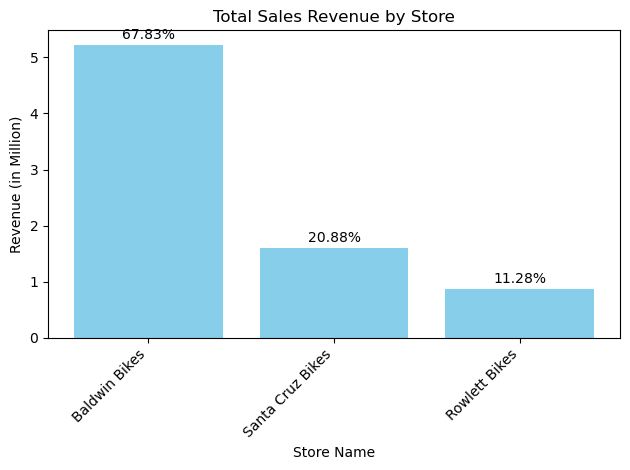

In [303]:
# Plotting the bar chart
plt.figure
plt.bar(df['Store_Name'], df['Revenue_in_Million'], color='skyblue')
plt.title('Total Sales Revenue by Store')
plt.xlabel('Store Name')
plt.ylabel('Revenue (in Million)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the percentage above each bar
for i, value in enumerate(df['Percentage']):
    plt.text(i, df['Revenue_in_Million'].iloc[i] + 0.1, f'{value}%', ha='center')

plt.show()


Observing the data, Baldwin Bikes emerges with the highest revenue percentage among the three stores, accounting for nearly 68%. In contrast, Santa Cruz Bikes and Rowlett Bikes represent approximately 21% and 11%, respectively. This implies that Baldwin Bikes generates more revenue than the other two stores combined.

In [331]:
query = '''

WITH total_sale AS (
                    SELECT ot.order_date, 
                           oi.product_id,
                           oi.quantity, 
                           oi.list_price, 
                           oi.discount, 
                           ((oi.quantity * oi.list_price) * (1 - oi.discount)) AS total_sale_product
                    FROM order_items AS oi
                    LEFT JOIN orders AS ot ON oi.order_id = ot.order_id
)

SELECT strftime('%Y', order_date) AS Year,
       ROUND (SUM(total_sale_product)/1000000, 2) AS Total_Revenue_in_Million
       
FROM total_sale
GROUP BY year
ORDER BY Total_Revenue_in_Million DESC

      
        '''

df = pd.read_sql_query(query, connection)
df

,Year,Total_Revenue_in_Million
0,2017,3.45
1,2016,2.43
2,2018,1.81


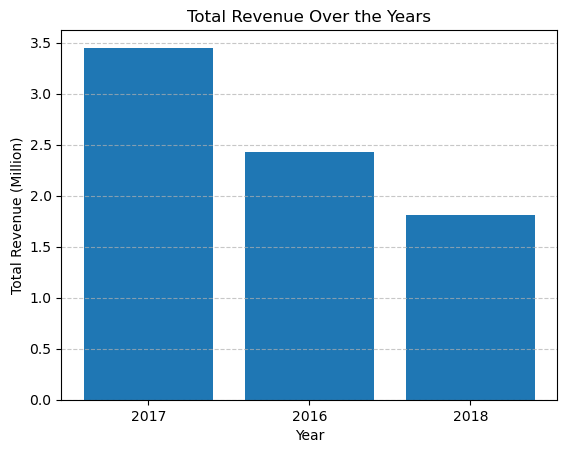

In [332]:
plt.figure
plt.bar(df['Year'], df['Total_Revenue_in_Million'])
plt.xlabel('Year')
plt.ylabel('Total Revenue (Million)')
plt.title('Total Revenue Over the Years')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

The revenue demonstrated an ascending trajectory from 2016 to 2017, escalating from 2.43 million in 2016 to 3.45 million in 2017. Conversely, in 2018, a decline occurred, resulting in total revenue plummeting to 1.81 million. When compared to the preceding year (2017), this represented an almost 48% decrease in total revenue.

Now, let's break down the revenue by month for each year to better understand the revenue sources.

In [333]:
query = '''
WITH total_sale AS (
    SELECT 
        strftime('%Y', ot.order_date) AS Year, 
        strftime('%m', ot.order_date) AS Month,
        oi.product_id,
        oi.quantity, 
        oi.list_price, 
        oi.discount, 
        ((oi.quantity * oi.list_price) * (1 - oi.discount)) AS total_sale_product
    FROM order_items AS oi
    LEFT JOIN orders AS ot ON oi.order_id = ot.order_id
)

SELECT 
    Year,
    Month,
    ROUND(SUM(total_sale_product)/1000000, 2) AS Total_Revenue_in_Million_2016
FROM total_sale
WHERE Year= '2016'
GROUP BY Year, Month
ORDER BY Year, Total_Revenue_in_Million_2016 DESC;
'''

df_2016 = pd.read_sql_query(query, connection)
df_2016

,Year,Month,Total_Revenue_in_Million_2016
0,2016,09,0.27
1,2016,08,0.23
2,2016,01,0.22
3,2016,10,0.21
4,2016,06,0.21
5,2016,05,0.21
6,2016,12,0.20
7,2016,07,0.20
8,2016,11,0.18
9,2016,03,0.18


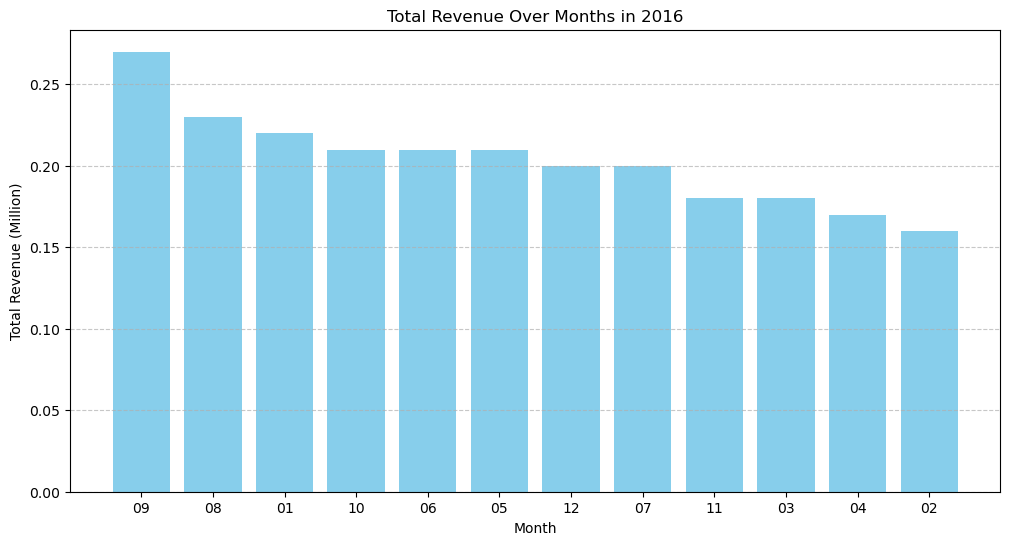

In [334]:
plt.figure(figsize=(12, 6))
plt.bar(df_2016['Month'], df_2016['Total_Revenue_in_Million_2016'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Million)')
plt.title('Total Revenue Over Months in 2016')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [335]:
query = '''
WITH total_sale AS (
    SELECT 
        strftime('%Y', ot.order_date) AS Year, 
        strftime('%m', ot.order_date) AS Month,
        oi.product_id,
        oi.quantity, 
        oi.list_price, 
        oi.discount, 
        ((oi.quantity * oi.list_price) * (1 - oi.discount)) AS total_sale_product
    FROM order_items AS oi
    LEFT JOIN orders AS ot ON oi.order_id = ot.order_id
)

SELECT 
    Year,
    Month,
    ROUND(SUM(total_sale_product)/1000000, 2) AS Total_Revenue_in_Million_2017
FROM total_sale
WHERE Year= '2017'
GROUP BY Year, Month
ORDER BY Year, Total_Revenue_in_Million_2017 DESC;
'''

df_2017 = pd.read_sql_query(query, connection)
df_2017

,Year,Month,Total_Revenue_in_Million_2017
0,2017,06,0.38
1,2017,10,0.31
2,2017,03,0.31
3,2017,02,0.31
4,2017,09,0.29
5,2017,08,0.29
6,2017,01,0.29
7,2017,11,0.28
8,2017,05,0.27
9,2017,12,0.26


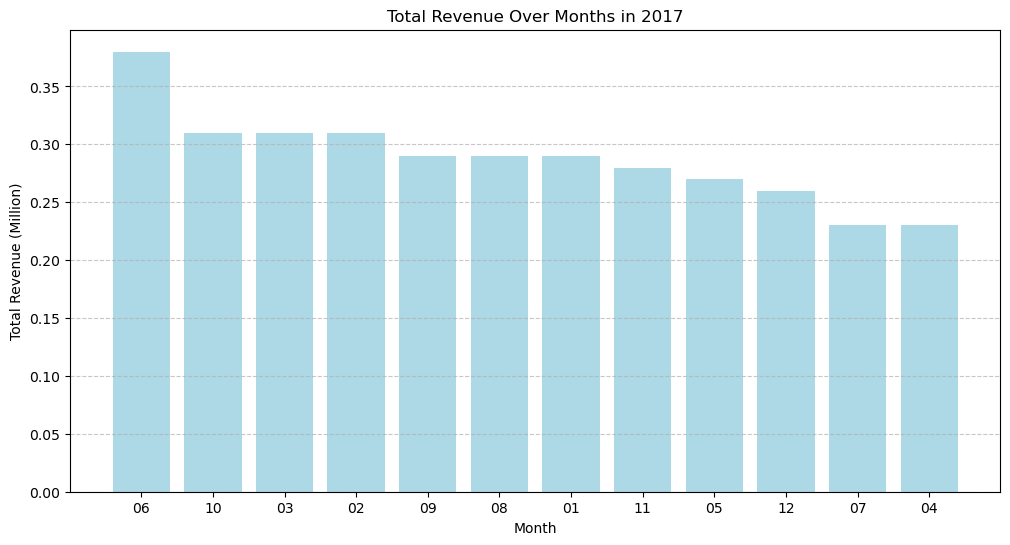

In [336]:
plt.figure(figsize=(12, 6))
plt.bar(df_2017['Month'], df_2017['Total_Revenue_in_Million_2017'], color='lightblue')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Million)')
plt.title('Total Revenue Over Months in 2017')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [337]:
query = '''
WITH total_sale AS (
    SELECT 
        strftime('%Y', ot.order_date) AS Year, 
        strftime('%m', ot.order_date) AS Month,
        oi.product_id,
        oi.quantity, 
        oi.list_price, 
        oi.discount, 
        ((oi.quantity * oi.list_price) * (1 - oi.discount)) AS total_sale_product
    FROM order_items AS oi
    LEFT JOIN orders AS ot ON oi.order_id = ot.order_id
)

SELECT 
    Year,
    Month,
    ROUND(SUM(total_sale_product)/1000000, 2) AS Total_Revenue_in_Million_2018
FROM total_sale
WHERE Year= '2018'
GROUP BY Year, Month
ORDER BY Year, Total_Revenue_in_Million_2018 DESC;
'''

df_2018 = pd.read_sql_query(query, connection)
df_2018

,Year,Month,Total_Revenue_in_Million_2018
0,2018,04,0.82
1,2018,01,0.38
2,2018,03,0.36
3,2018,02,0.20
4,2018,12,0.01
5,2018,11,0.01
6,2018,09,0.01
7,2018,08,0.01
8,2018,07,0.01
9,2018,10,0.00


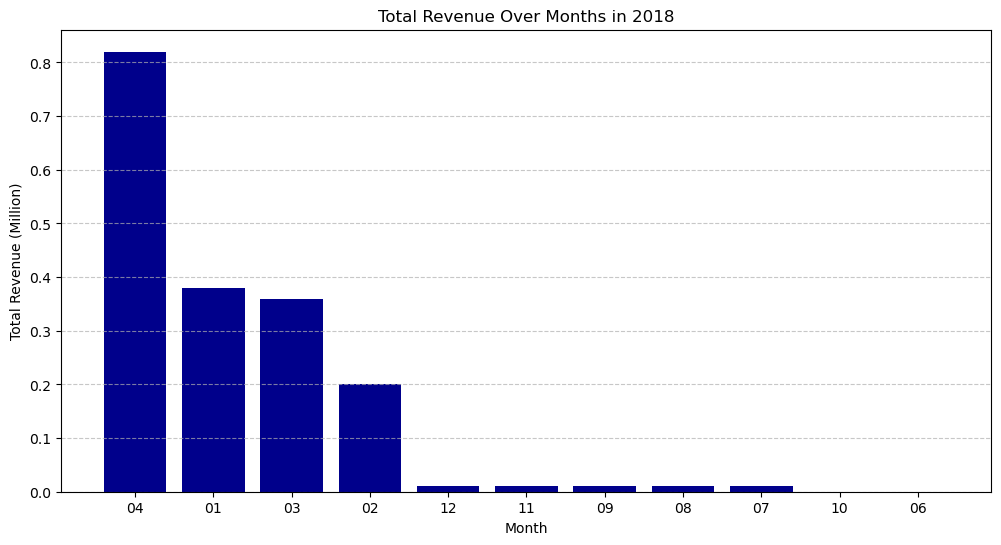

In [339]:
plt.figure(figsize=(12, 6))
plt.bar(df_2018['Month'], df_2018['Total_Revenue_in_Million_2018'], color='darkblue')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Million)')
plt.title('Total Revenue Over Months in 2018')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In 2016, September emerged as the month with the highest total revenue, amounting to \\$0.27 million, while February recorded the lowest at \\$0.16 million, signifying a notable difference of more than \\$0.10 million.

Conversely, the revenue dynamics shifted in 2017. Unlike 2016, June took the lead as the month with the highest total revenue, relegating September to the fifth position. Additionally, April and July stood out as the months with the lowest total revenue, each recording only \\$0.23 million.

In 2018, a departure from the 2017 pattern was evident, with April securing the highest total revenue at \\$0.82 million. Interestingly, from June to December, the total revenue remained consistently below \\$0.01 million. This substantial decline in revenue explains the nearly 48% drop observed in total revenue from 2017 to 2018.

Now that we've examined the monthly total revenue for each year, let's now determine, across all three years, the month that has the highest overall total revenue.

In [176]:
query = '''

WITH total_sale AS (
                    SELECT ot.order_date, 
                           oi.product_id,
                           oi.quantity, 
                           oi.list_price, 
                           oi.discount, 
                           ((oi.quantity * oi.list_price) * (1 - oi.discount)) AS total_sale_product
                    FROM order_items AS oi
                    LEFT JOIN orders AS ot ON oi.order_id = ot.order_id
)

SELECT strftime('%m', order_date) AS Month,
       ROUND(SUM(total_sale_product)/1000000, 2) AS Total_Revenue_in_Million
       
FROM total_sale
GROUP BY Month
ORDER BY Total_Revenue_in_Million DESC


        
        '''

#Instead of use strftime('%m', orer_date) in other sql servers you can use (EXTRACT(MONTH FROM order_date))


df = pd.read_sql_query(query, connection)
df

,Month,Total_Revenue_in_Million
0,04,1.21
1,01,0.88
2,03,0.85
3,02,0.67
4,06,0.59
5,09,0.58
6,10,0.53
7,08,0.52
8,11,0.48
9,12,0.47


As evident from our analysis covering the three-year period, April consistently emerged as the month with the highest total revenue. This trend might be associated with the anticipation of summer, prompting individuals to make purchases and prepare for the upcoming season during the month of April.

In [177]:
#- Most valuable costumer
query = '''
        with Total_Spent AS
             (SELECT oi.order_id,
                     ot.customer_id,
                     c.first_name,
                     c.last_name,
                     ot.order_date, 
                     oi.product_id,
                     oi.quantity, 
                     oi.list_price, 
                     oi.discount, 
                     ((oi.quantity * oi.list_price) * (1-oi.discount)) AS total_sale_product
              FROM order_items AS oi
              LEFT JOIN orders AS ot
              ON oi.order_id = ot.order_id
              LEFT JOIN customers AS c
              ON ot.customer_id = c.customer_id) 
              
              
        SELECT customer_id AS Customer_Id, first_name AS First_Name, last_name AS Last_Name, ROUND(SUM(total_sale_product),2) AS Total_Spent
        FROM Total_Spent
        GROUP BY Customer_Id, First_Name, Last_Name
        ORDER BY Total_Spent DESC
        LIMIT 10 
        '''

df = pd.read_sql_query(query, connection)
df

,Customer_Id,First_Name,Last_Name,Total_Spent
0,94,Sharyn,Hopkins,34807.94
1,10,Pamelia,Newman,33634.26
2,75,Abby,Gamble,32803.01
3,6,Lyndsey,Bean,32675.07
4,16,Emmitt,Sanchez,31925.89
5,73,Melanie,Hayes,31913.69
6,1,Debra,Burks,27888.18
7,61,Elinore,Aguilar,25636.45
8,93,Corrina,Sawyer,25612.70
9,122,Shena,Carter,24890.62


By examining the table, it becomes evident that Sharyn H. holds the record for the highest expenditure, nearly reaching \\$35,000. In contrast, Shena Carter, who spent the least, had an amount approximately \\$10,000 less than the highest spender.

In [178]:
# Best-selling product in total revenue

query = """
WITH total_sales AS (
                    SELECT ot.order_date,
                           oi.product_id,
                           p.product_name,
                           oi.quantity, 
                           oi.list_price, 
                           oi.discount, 
                           ((oi.quantity * oi.list_price) * (1 - oi.discount)) AS total_sale_product
                    FROM order_items AS oi
                    LEFT JOIN products AS p 
                    ON oi.product_id = p.product_id
                    LEFT JOIN orders as ot
                    ON oi.order_id = ot.order_id 
)


SELECT  product_name AS Product_name,
        SUM(quantity) AS Quantity_Sold,
        ROUND(SUM(total_sale_product)/1000000, 2) AS Total_Revenue_in_Million
FROM   total_sales
GROUP BY Product_Name
ORDER BY  Total_Revenue_in_Million DESC
LIMIT 10
"""

df = pd.read_sql_query(query, connection)
df

,Product_name,Quantity_Sold,Total_Revenue_in_Million
0,Trek Slash 8 27.5 - 2016,154,0.56
1,Trek Conduit+ - 2016,145,0.39
2,Trek Fuel EX 8 29 - 2016,143,0.37
3,Surly Straggler 650b - 2016,151,0.23
4,Trek Domane SLR 6 Disc - 2017,43,0.21
5,Trek Remedy 29 Carbon Frameset - 2016,125,0.20
6,Surly Straggler - 2016,147,0.20
7,Trek Powerfly 8 FS Plus - 2017,41,0.19
8,Trek Madone 9.2 - 2017,39,0.18
9,Trek Silque SLR 8 Women's - 2017,29,0.17


We observe that the Trek Slash 8 27.5 - 2016 yielded the highest total revenue, amounting to \\$0.56 million, driven by the sale of 154 units. In contrast, the Trek Silque SLR 8 Women's - 2017, with only 29 units sold, generated less than \\$0.20 million.

In [179]:
# Best-selling product in quantity sold

query = """
WITH total_sales AS (
                    SELECT ot.order_date,
                           oi.product_id,
                           p.product_name,
                           oi.quantity, 
                           oi.list_price, 
                           oi.discount, 
                           ((oi.quantity * oi.list_price) * (1 - oi.discount)) AS total_sale_product
                    FROM order_items AS oi
                    LEFT JOIN products AS p 
                    ON oi.product_id = p.product_id
                    LEFT JOIN orders as ot
                    ON oi.order_id = ot.order_id 
)


SELECT  product_name AS Product_name,
        SUM(quantity) AS Quantity_Sold,
        ROUND(SUM(total_sale_product)/1000000, 2) AS Total_Revenue_in_Million
FROM   total_sales
GROUP BY Product_Name
ORDER BY  Quantity_Sold DESC

"""

df = pd.read_sql_query(query, connection)
df

,Product_name,Quantity_Sold,Total_Revenue_in_Million
0,Electra Cruiser 1 (24-Inch) - 2016,296,0.07
1,Electra Townie Original 7D EQ - 2016,290,0.16
2,Electra Townie Original 21D - 2016,289,0.14
3,Electra Girl's Hawaii 1 (16-inch) - 2015/2016,269,0.06
4,Surly Ice Cream Truck Frameset - 2016,167,0.07
...,...,...,...
273,Electra Straight 8 1 (16-inch) - Boy's - 2018,1,0.00
274,Electra Soft Serve 1 (16-inch) - Girl's - 2018,1,0.00
275,Electra Cruiser 7D - 2016/2017/2018,1,0.00
276,Electra Cruiser 1 Tall - 2016/2018,1,0.00


The Electra Cruiser 1 (24-Inch) - 2016 emerged as the top-performing product, achieving the highest sales with 296 units and generating \\$0.07 million in revenue. In contrast, a few other models, including Electra Amsterdam Royal 8i - 2017/2018, Electra Cruiser 1 Tall - 2016/2018, and Electra Cruiser 7D - 2016/2017/2018, experienced minimal sales, each selling fewer than 5 units and generating revenue below \\$0.01 million.

Now, let's check the top selling products based on the year:

In [180]:
# 2016

query = """
WITH total_sales AS (
                    SELECT ot.order_date,
                           oi.product_id,
                           p.product_name,
                           oi.quantity, 
                           oi.list_price, 
                           oi.discount, 
                           ((oi.quantity * oi.list_price) * (1 - oi.discount)) AS total_sale_product
                    FROM order_items AS oi
                    LEFT JOIN products AS p 
                    ON oi.product_id = p.product_id
                    LEFT JOIN orders as ot
                    ON oi.order_id = ot.order_id 
)


SELECT  product_name AS Product_Name,
        SUM(quantity) AS Quantity_Sold,
        ROUND(SUM(total_sale_product)/1000000, 2) AS Total_Revenue_in_Million_2016
FROM   total_sales
WHERE  order_date <= '2016-12-31'
GROUP BY Product_Name
ORDER BY  Total_Revenue_in_Million_2016 DESC
LIMIT 10
"""

df = pd.read_sql_query(query, connection)
df

,Product_Name,Quantity_Sold,Total_Revenue_in_Million_2016
0,Trek Slash 8 27.5 - 2016,116,0.42
1,Trek Fuel EX 8 29 - 2016,111,0.28
2,Trek Conduit+ - 2016,104,0.28
3,Trek Remedy 29 Carbon Frameset - 2016,105,0.17
4,Surly Straggler 650b - 2016,114,0.17
5,Surly Straggler - 2016,119,0.16
6,Heller Shagamaw Frame - 2016,93,0.11
7,Electra Townie Original 7D EQ - 2016,213,0.11
8,Electra Townie Original 21D - 2016,217,0.11
9,Surly Wednesday Frameset - 2016,104,0.09


In [181]:
# 2017

query = """
WITH total_sales AS (
                    SELECT ot.order_date,
                           oi.product_id,
                           p.product_name,
                           oi.quantity, 
                           oi.list_price, 
                           oi.discount, 
                           ((oi.quantity * oi.list_price) * (1 - oi.discount)) AS total_sale_product
                    FROM order_items AS oi
                    LEFT JOIN products AS p 
                    ON oi.product_id = p.product_id
                    LEFT JOIN orders as ot
                    ON oi.order_id = ot.order_id 
)


SELECT  product_name AS Product_Name,
        SUM(quantity) AS Quantity_Sold,
        ROUND(SUM(total_sale_product)/1000000, 2) AS Total_Revenue_in_Million_2017
FROM   total_sales
WHERE  (order_date >= '2017-01-01') AND (order_date <= '2017-12-31')
GROUP BY Product_Name
ORDER BY  Total_Revenue_in_Million_2017 DESC
LIMIT 10
"""

df = pd.read_sql_query(query, connection)
df

,Product_Name,Quantity_Sold,Total_Revenue_in_Million_2017
0,Trek Domane SLR 6 Disc - 2017,40,0.20
1,Trek Silque SLR 8 Women's - 2017,26,0.16
2,Trek Powerfly 8 FS Plus - 2017,34,0.16
3,Trek Madone 9.2 - 2017,33,0.15
4,Trek Silque SLR 7 Women's - 2017,26,0.14
5,Trek Fuel EX 9.8 27.5 Plus - 2017,26,0.13
6,Trek Fuel EX 9.8 29 - 2017,27,0.12
7,Trek Boone 7 - 2017,40,0.12
8,Trek Slash 8 27.5 - 2016,32,0.11
9,Trek Remedy 9.8 - 2017,20,0.10


In [182]:
# 2018

query = """
WITH total_sales AS (
                    SELECT ot.order_date,
                           oi.product_id,
                           p.product_name,
                           oi.quantity, 
                           oi.list_price, 
                           oi.discount, 
                           ((oi.quantity * oi.list_price) * (1 - oi.discount)) AS total_sale_product
                    FROM order_items AS oi
                    LEFT JOIN products AS p 
                    ON oi.product_id = p.product_id
                    LEFT JOIN orders as ot
                    ON oi.order_id = ot.order_id 
)


SELECT  product_name AS Product_Name,
        SUM(quantity) AS Quantity_Sold,
        ROUND(SUM(total_sale_product)/1000000, 2) AS Total_Revenue_in_Million_2018
FROM   total_sales
WHERE  (order_date >= '2018-01-01') AND (order_date <= '2018-12-31')
GROUP BY Product_Name
ORDER BY  Total_Revenue_in_Million_2018 DESC
LIMIT 10
"""

df = pd.read_sql_query(query, connection)
df

,Product_Name,Quantity_Sold,Total_Revenue_in_Million_2018
0,Trek Domane SLR 9 Disc - 2018,5,0.05
1,Trek Super Commuter+ 8S - 2018,8,0.04
2,Trek Powerfly 7 FS - 2018,8,0.04
3,Electra Townie Commute Go! Ladies' - 2018,13,0.04
4,Trek Super Commuter+ 7 - 2018,8,0.03
5,Trek Powerfly 8 FS Plus - 2017,7,0.03
6,Trek Madone 9.2 - 2017,6,0.03
7,Trek Fuel EX 9.8 29 - 2017,6,0.03
8,Trek Fuel EX 9.8 27.5 Plus - 2017,7,0.03
9,Trek Fuel EX 8 29 XT - 2018,10,0.03


By analyzing the three aforementioned queries, we observe distinctive trends across the years. In 2016, the Trek Slash 8 27.5 - 2016 outshone with the sale of 116 units, generating \\$0.42 million. Moving to 2017, the Trek Domane SLR 6 Disc - 2017 had approximately 40 units sold, accumulating \\$0.20 million in revenue.

Contrastingly, in 2018, the Trek Domane SLR 9 Disc - 2018 witnessed a significant drop in sales volume, with only 5 units sold. Nevertheless, it emerged as the top revenue generator for the year, amassing \\$0.05 million.

Notably, there is a conspicuous decline in revenue in 2018. While 2016 and 2017 showcased the highest total revenues at \\$0.42 million and \\$0.20 million, respectively, the top revenue in 2018 failed to surpass \\$0.10 million.

After examining the best-selling products for each year, let's now check the Top 3 staff members who contributed the most to the overall revenue.

In [183]:
query = """
with subquery as (
                    SELECT oi.order_id,
                           oi.product_id,
                           oi.quantity,
                           oi.list_price,
                           oi.discount,
                           ROUND(((oi.quantity * oi.list_price) * (1 - oi.discount)),2) AS final_price,
                           s.staff_id,
                           s.first_name,
                           s.last_name

                    FROM order_items as oi
                    FULL JOIN orders as ot
                    ON oi.order_id = ot.order_id
                    FULL JOIN staffs as s
                    ON ot.staff_id = s.staff_id)
                    
SELECT  staff_id AS Staff_Id,
        first_name AS First_name,
        last_name AS Last_Name,
        ROUND(SUM(final_price)/1000000, 2) AS Staff_Revenue_in_Million
FROM subquery
GROUP BY staff_id
ORDER BY Staff_Revenue_in_Million DESC
Limit 3

"""

df = pd.read_sql_query(query, connection)
df

,Staff_Id,First_name,Last_Name,Staff_Revenue_in_Million
0,6,Marcelene,Boyer,2.62
1,7,Venita,Daniel,2.59
2,3,Genna,Serrano,0.85


The top three earners, Marcelene Boyer, Venita Daniel, and Genna Serrano, contributed significantly with revenues of $2.62 million, $2.59 million, and $0.85 million, respectively. This data holds paramount importance for potential year-end rewards to recognize the top performers. While applying this criterion for rewards, we would need to apply a year filter. However, this serves as a demonstration of the methodology for identifying the top three contributors based on revenue.

To be continued...